<a href="https://colab.research.google.com/github/HammadN98/Curso_Estatistica/blob/main/S10Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Importacoes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Base de dados

In [2]:
base = pd.read_csv("https://raw.githubusercontent.com/HammadN98/Curso_Estatistica/main/dados/census.csv")
base

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Graficos

## Dispersao

Usado para quando se quer medir a relecao entre duas variaveis, quanttativas, sendo cada ponto um par de valores(X, y).
Quando usar: Para identificar a correlacao entre um par, ou a distribuicao e identificar clusters


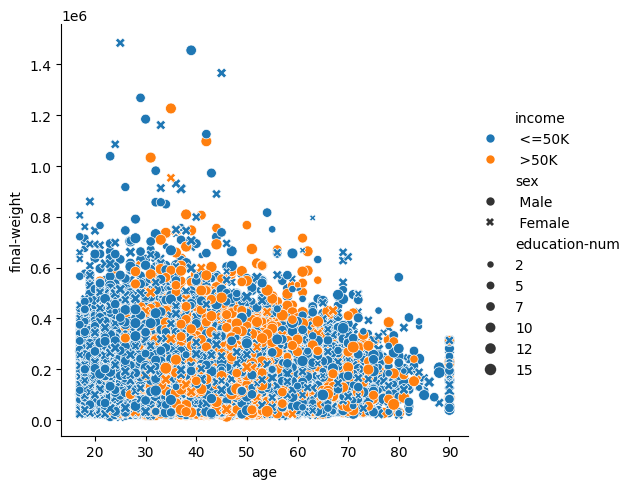

In [3]:
sns.relplot(x = 'age', y = 'final-weight', data=base,
            hue = 'income', style = 'sex', size = 'education-num');

            #hue=Adiciona uma dimensao extra no grafico, utilizando cores para diferenciar os valores da categoria
            #style=Adiciona um stilo de forma aos pontos de dados com base na categoria passada
            #size=Ajusta o tamanho dos pontos com base na categoria passada

## Barras

Utilizado para comparar categorias ou grupos de dados, e utilizado por que e eficaz para mostar as diferencas das categorias em comparacoes diretas

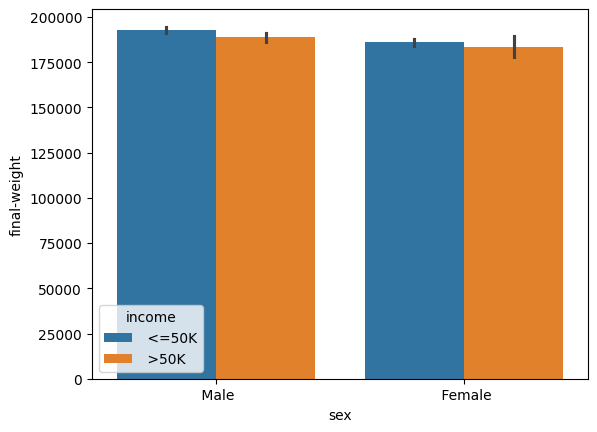

In [5]:
sns.barplot(x = 'sex', y = 'final-weight', data=base, hue = 'income');

## Linha

Usado para compara em relacao ao tempo, sendo os valores continuos em um determinado periodo ou intervalo. Usado para observar tendecias, sazonalidades e padroes de tempo.

In [6]:
vendas = {'mes': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
          'valor': np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])}
vendas_df = pd.DataFrame(vendas)
vendas_df

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


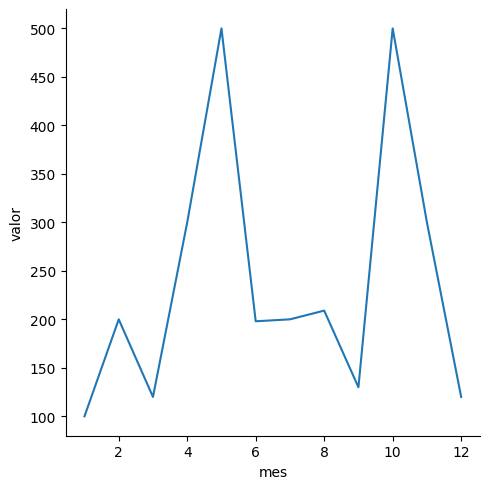

In [7]:
sns.relplot(x = 'mes', y = 'valor', kind = 'line', data=vendas_df);

## boxplot

Serve para obeservar de maenira resum ida a distribuicao dos dados e encontar outliers. Sobre o grafico: A caixa mostra o intervalo entre Q1 a Q3, e a linha central eh a mediana, dentro das pontas fica o intervalo esperados para os dados, e fora sao os autliers. Essencial para analise exploratoria

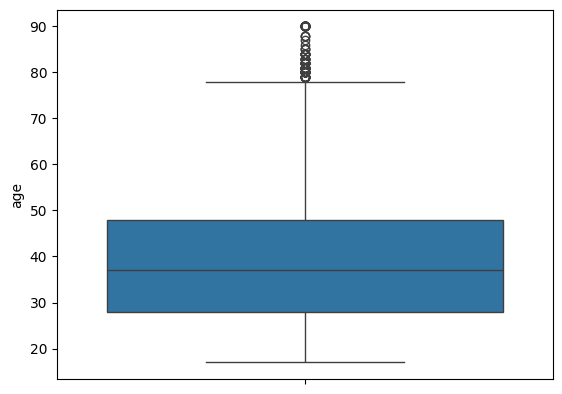

In [10]:
sns.boxplot(base['age']);


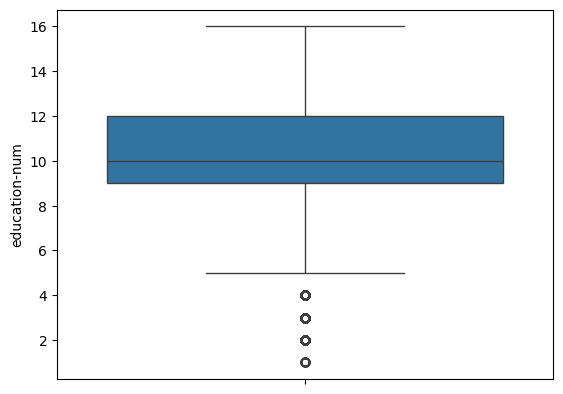

In [11]:
sns.boxplot(base['education-num']);


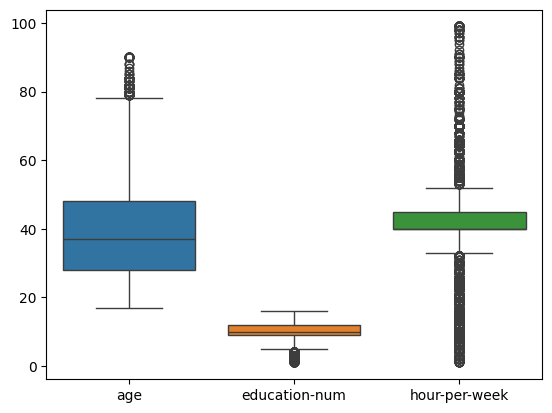

In [12]:
dataset2 = base.iloc[:, [0, 4, 12]]
dataset2.head()

sns.boxplot(data=dataset2);

#Essa coisa feia eh proposital, para entender que nao se deve comparar coisas em escalar diferentes, grato.

## Categoricos

Compara grupos e categorias, variaveis categoricas e ou discretas


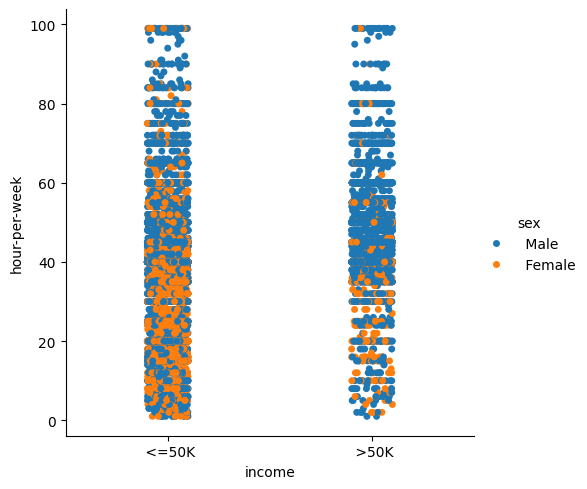

In [13]:
sns.catplot(x = 'income', y = 'hour-per-week', data=base, hue = 'sex');

## Subplot

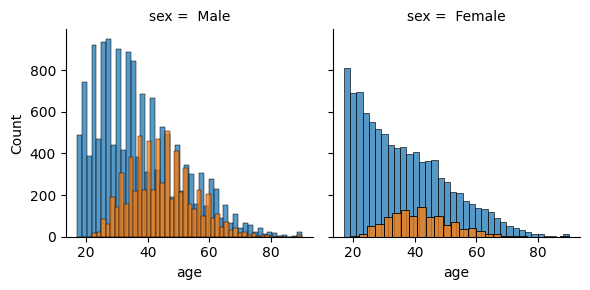

In [14]:
g = sns.FacetGrid(base, col = 'sex', hue = 'income') #A coluna escolhida da os dados ao grafico, o hue da a cor de divisao
g.map(sns.histplot, 'age'); #Tipo de grafico e colunas, so uma coluna X


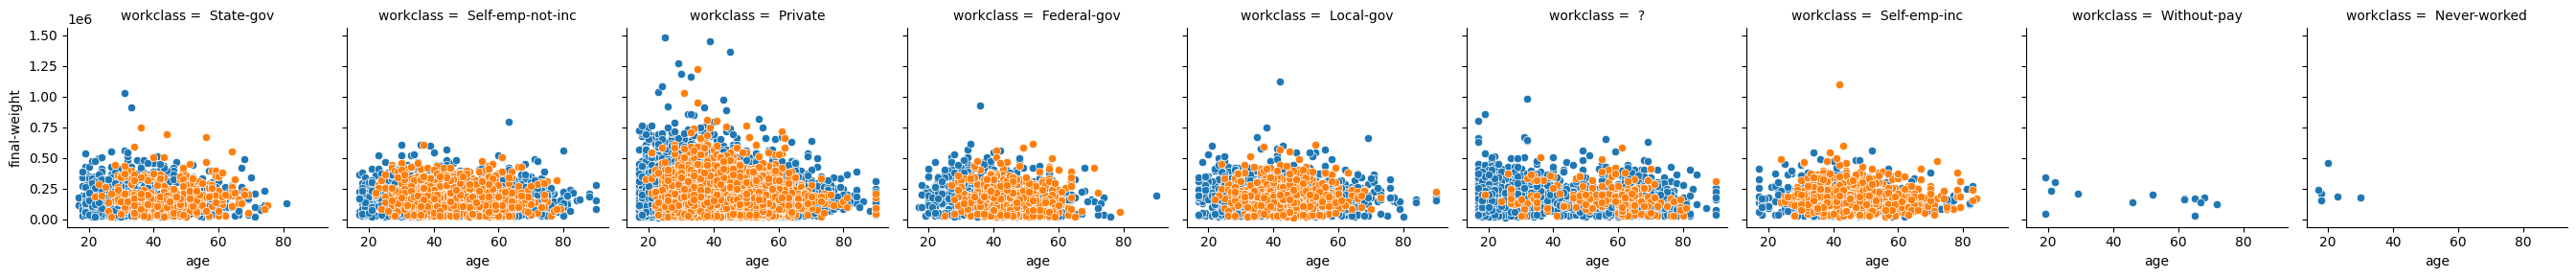

In [15]:
g = sns.FacetGrid(base, col = 'workclass', hue = 'income')
g.map(sns.scatterplot, 'age', 'final-weight'); #Como tem X e y, primeiro passa o X e depois o Y

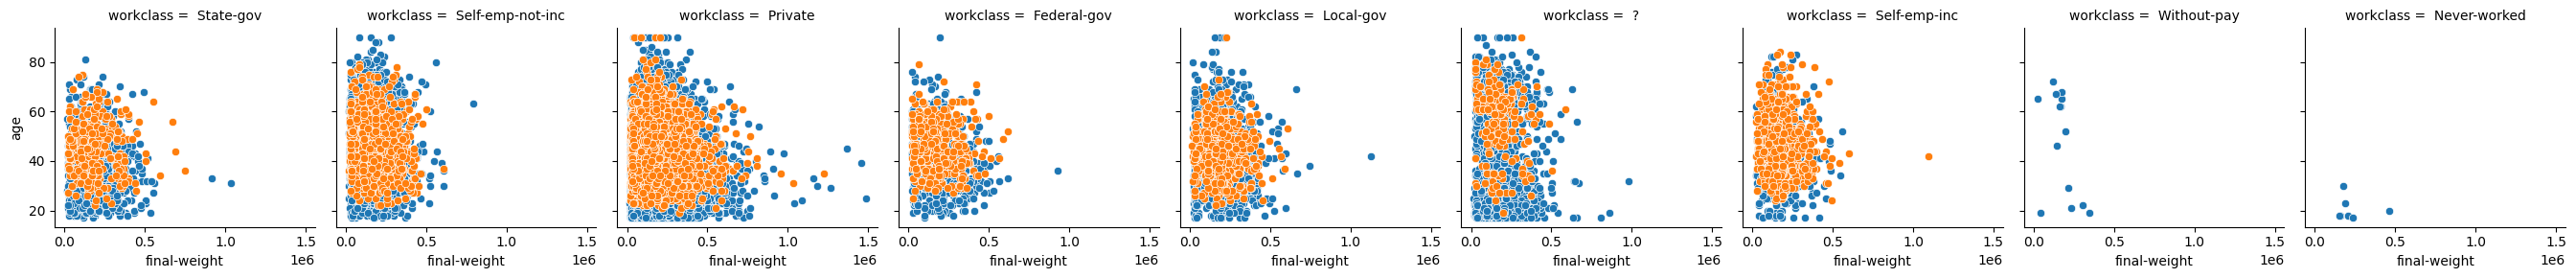

In [17]:
g = sns.FacetGrid(base, col = 'workclass', hue = 'income')
g.map(sns.scatterplot,  'final-weight', 'age');
#Esse grafico no tem sentido
#Apenas para exemplificar o contrario